In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import scipy
import os
exp_name = "nonlinearnews"
type_name = "prog"
save_name = exp_name + "_" + type_name

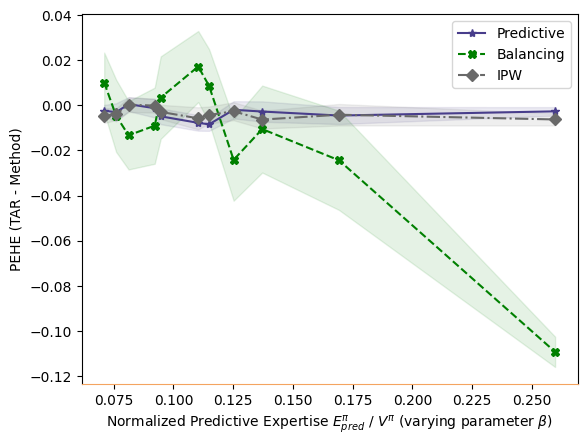

In [26]:
# for the d experiment, we take beta = 4.0
# Lists to store---in order---Ours, CFRNet, TARNet, IPW, ground truth expertise, ground truth action variability
d_ce = []
d_cfr = []
d_tar = []
d_ipw = []
d_exp = []
d_av = []
d_ce_exp = []
d_cfr_exp = []
d_tar_exp = []
d_ipw_exp = []

# Sorting
all_files = []
for file in os.listdir("."):
    if exp_name in file and type_name in file and "4.0" in file and "entropy" not in file:# and "non" not in file:
        all_files.append(file)
# print(all_files)
all_files = sorted(all_files)
assert "10" in all_files[2]
ten = all_files.pop(2)
all_files.append(ten)
all_files.reverse()
# print(all_files)

for file in all_files:
        # print(file)
        ce = []
        cfr = []
        tar = []
        ipw = []
        with open(file, "r") as f:
            lines = f.read()
            lines = lines.split("\n")
            lines = [i for i in lines if "seed" not in i and len(i) > 0][:10]
            # lines = [i for i in lines if len(i) > 0]
            # print(len(text))
            assert len(lines) == 10
            for text in lines:
                text = text.split("ce")[-1].split("cfr")
                # print(text)
                ce.append(float(text[0]))
                text = text[-1].split("tar")
                cfr.append(float(text[0]))
                text = text[-1].split("ipw")
                tar.append(float(text[0]))
                ipw.append(float(text[-1]))
        d_ce.append(ce)
        d_cfr.append(cfr)
        d_tar.append(tar)
        d_ipw.append(ipw)
        
        ce = []
        cfr = []
        tar = []
        ipw = []
        gt = []
        av = []
        with open("entropy" + file, "r") as f:
            lines = f.read()
            lines = lines.split("\n")
            lines = [i for i in lines if "seed" not in i and len(i) > 0]
            # lines = [i for i in lines if len(i) > 0]
            # print(len(text))
            assert len(lines) == 10
            for text in lines:
                text = text.split("ce")[-1].split("cfr")
                # print(text)
                ce.append(float(text[0]))
                text = text[-1].split("tar")
                cfr.append(float(text[0]))
                text = text[-1].split("ipw")
                tar.append(float(text[0]))
                text = text[-1].split("gt")
                ipw.append(float(text[0]))
                text = text[-1].split("av")
                gt.append(float(text[0]))
                av.append(float(text[-1]))
                
        d_ce_exp.append(ce)
        d_cfr_exp.append(cfr)
        d_tar_exp.append(tar)
        d_ipw_exp.append(ipw)
        d_exp.append(gt)
        d_av.append(av)
# print(len(d_ce), len(d_cfr), len(d_tar), len(d_ipw))
# print(np.array(d_ce).shape, np.array(d_cfr).shape, np.array(d_tar).shape, np.array(d_ipw).shape)

d_ce_std = scipy.stats.sem(np.array(d_tar) - np.array(d_ce), axis=1)
d_ce = np.mean(np.array(d_tar) - np.array(d_ce), axis=1)
d_cfr_std = scipy.stats.sem(np.array(d_tar) - np.array(d_cfr), axis=1)
d_cfr = np.mean(np.array(d_tar) - np.array(d_cfr), axis=1)
d_ipw_std = scipy.stats.sem(np.array(d_tar) - np.array(d_ipw), axis=1)
d_ipw = np.mean(np.array(d_tar) - np.array(d_ipw), axis=1)
d_tar_std = scipy.stats.sem(np.array(d_tar), axis=1)
d_tar = np.mean(np.array(d_tar), axis=1)

d_exp_std = scipy.stats.sem(np.array(d_exp), axis=1)
d_exp = np.mean(np.array(d_exp), axis=1)
d_av_std = scipy.stats.sem(np.array(d_av), axis=1)
d_av = np.mean(np.array(d_av), axis=1)

# print(d_ce.shape, d_cfr.shape, d_tar.shape, d_ipw.shape)

xaxis = range(len(d_ce))
my_xticks = ['irrelevant', '', '', '', '', '', '', 'predictive']
ax = plt.axes()
ax.spines['bottom'].set_color("sandybrown")

plt.plot(d_exp / d_av, d_ce, label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.plot(d_exp / d_av, d_cfr, label="Balancing", color="green", linestyle="--", marker="X")
plt.plot(d_exp / d_av, d_ipw, label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(d_exp / d_av, d_ce - d_ce_std, d_ce + d_ce_std, alpha=0.1, color="darkslateblue")
plt.fill_between(d_exp / d_av, d_cfr - d_cfr_std, d_cfr + d_cfr_std, alpha=0.1, color="green")
plt.fill_between(d_exp / d_av, d_ipw - d_ipw_std, d_ipw + d_ipw_std, alpha=0.1, color="dimgray")
# plt.plot(np.array(gtval)[indices] / np.array(avval)[indices], np.array(tarval)[indices], label="tar", color="yellow", linestyle="-.", marker="D")
# plt.fill_between(np.array(gtval)[indices] / np.array(avval)[indices], (np.array(tarval)-np.array(tarerr))[indices], (np.array(tarval)+np.array(tarerr))[indices], alpha=0.1, color="darkslateblue")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel("PEHE (TAR - Method)")
# plt.savefig("propscale.pdf")
plt.show()

if not os.path.exists(save_name):
    os.makedirs(save_name)
    
with open(os.path.join(save_name, "d-policyaware.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ce[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-policyaware-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ce[i] - d_ce_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-policyaware-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ce[i] + d_ce_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-balancing.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_cfr[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-balancing-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_cfr[i] - d_cfr_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-balancing-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_cfr[i] + d_cfr_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-propensity.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ipw[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-propensity-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ipw[i] - d_ipw_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-propensity-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ipw[i] + d_ipw_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-tar.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_tar[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-tar-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_tar[i] - d_tar_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "d-tar-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_tar[i] + d_tar_std[i]))
        f.write("\n")

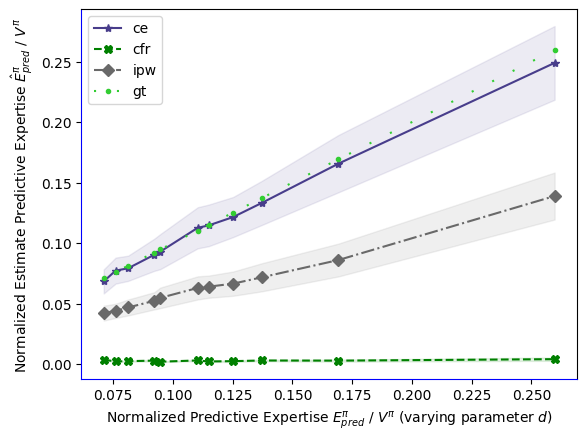

In [27]:
# print(np.array(d_ce_exp).shape, np.array(d_cfr_exp).shape, np.array(d_tar_exp).shape, np.array(d_ipw_exp).shape)
d_ce_exp_std = scipy.stats.sem(np.array(d_ce_exp), axis=1)
d_ce_exp = np.mean(np.array(d_ce_exp), axis=1)
d_cfr_exp_std = scipy.stats.sem(np.array(d_cfr_exp), axis=1)
d_cfr_exp = np.mean(np.array(d_cfr_exp), axis=1)
d_ipw_exp_std = scipy.stats.sem(np.array(d_ipw_exp), axis=1)
d_ipw_exp = np.mean(np.array(d_ipw_exp), axis=1)
d_tar_exp_std = scipy.stats.sem(np.array(d_tar_exp), axis=1)
d_tar_exp = np.mean(np.array(d_tar_exp), axis=1)

ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")


plt.plot(d_exp / d_av, d_ce_exp / d_av, label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(d_exp / d_av, d_cfr_exp / d_av, label="cfr", color="green", linestyle="--", marker="X")
plt.plot(d_exp / d_av, d_ipw_exp / d_av, label="ipw", color="dimgray", linestyle="-.", marker="D")
# plt.plot(gtval[indices][start:] / avval[indices][start:], tarval[indices][start:] / avval[indices][start:], label="tar", color="dimgray", linestyle="-.", marker="D")
plt.plot(d_exp / d_av, d_exp / d_av, label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(d_exp / d_av, (d_ce_exp - d_ce_exp_std) / d_av, (d_ce_exp + d_ce_exp_std) / d_av, alpha=0.1, color="darkslateblue")
plt.fill_between(d_exp / d_av, (d_cfr_exp - d_cfr_exp_std) / d_av, (d_cfr_exp + d_cfr_exp_std) / d_av, alpha=0.1, color="green")
plt.fill_between(d_exp / d_av, (d_ipw_exp - d_ipw_exp_std) / d_av, (d_ipw_exp + d_ipw_exp_std) / d_av, alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (tarval[indices][start:]-tarerr[indices][start:]) / avval[indices][start:], (tarval[indices][start:]+tarerr[indices][start:]) / avval[indices][start:], alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (gtval[indices][start:]-gterr[indices][start:]) / avval[indices][start:], (gtval[indices][start:]+gterr[indices][start:]) / avval[indices][start:], alpha=0.1, color="limegreen")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("featureexpertise.pdf")
plt.show()

with open(os.path.join(save_name, "expd-policyaware.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ce_exp[i] / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-policyaware-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_ce_exp[i] - d_ce_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-policyaware-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_ce_exp[i] + d_ce_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-balancing.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_cfr_exp[i] / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-balancing-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_cfr_exp[i] - d_cfr_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-balancing-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_cfr_exp[i] + d_cfr_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-propensity.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_ipw_exp[i] / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-propensity-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_ipw_exp[i] - d_ipw_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-propensity-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_ipw_exp[i] + d_ipw_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-tar.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str(d_tar_exp[i] / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-tar-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_tar_exp[i] - d_tar_exp_std[i]) / d_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expd-tar-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(d_exp[i] / d_av[i]) + " " + str((d_tar_exp[i] + d_tar_exp_std[i]) / d_av[i]))
        f.write("\n")